# Principal Component Analysis for Python Scratch   

implementation of PCA algorithm to understand the behavior of the method, also using skleanr library

- Basis link of [PCA Method](https://www.cienciadedatos.net/documentos/py19-pca-python.html)

In [35]:
# Carga de datos

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from heatmap import heatmap, corrplot

# load dataset
data = datasets.load_wine()

## Initial exploration

In [9]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df_out = pd.DataFrame(data['data'], columns=data['feature_names']).assign(Species=data['target_names'][data['target']])
df.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

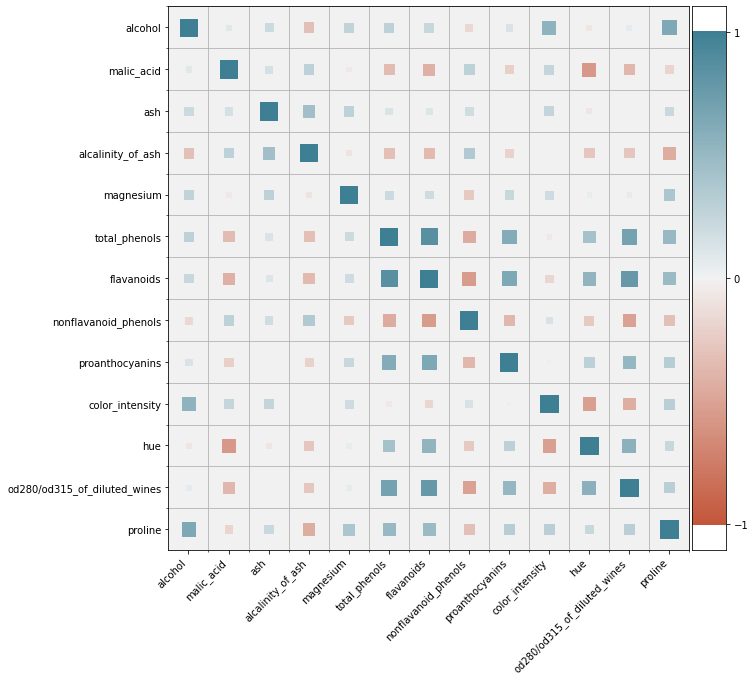

In [10]:
corr = df_out.corr() # Calculates correlation matrix

plt.figure(figsize=(10, 10))
corrplot(corr, size_scale=300)

In [11]:
df.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
dtype: float64

If not normalize, magnesium and proline will have adverse influence in the determination of PCA

## Implemetation of PCA

To reduce the influence of the scale diference in variables, it is necessary to normalize the dataset, each variable need to substract their mean and divide by standard deviation

https://www.youtube.com/watch?v=52d7ha-GdV8&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=11

In [83]:
# Data normalization

X_meaned = data.data - np.mean(data.data, axis=0) #  substract the mean
X_norm = X_meaned / np.std(data.data,axis=0)
# X_norm.mean(axis=0)
# X_norm.std(axis=0)


## Calculate covariace matrix

<AxesSubplot:>

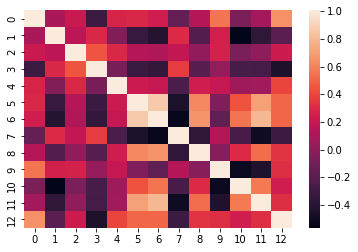

In [84]:
# Calculate the covariance matrix of mean-centered data
cov_mat = np.cov(X_norm, rowvar =False)

sns.heatmap(cov_mat)


## Calculate the Eigenvalues nad Eigenvectors

In [85]:
# Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

# Sort the eigenvalues in descendent order
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

Calculation of explained variance

<BarContainer object of 13 artists>

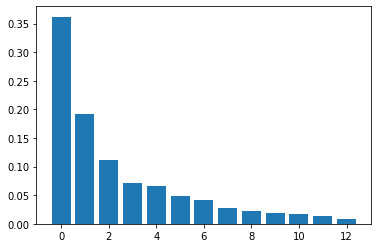

In [86]:
# calculation of total variance
total_var = np.sum(np.var(X_norm,axis=0))

# explained variance
transform = np.dot(X_norm, sorted_eigenvectors)
explained_var = np.var(transform, axis=0) / total_var

plt.bar(np.arange(len(explained_var)), explained_var)

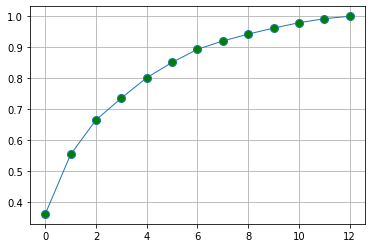

In [87]:
# cumulative explained variance
cumulative_var  =np.cumsum(explained_var)

plt.plot(cumulative_var, marker='o', linestyle='-', markerfacecolor='green',
     linewidth=1, markersize=8)
plt.grid()

Select a subset from the rearranged eigenvalue matrix

In [89]:
# select the first n eigenvectors, n is desired dimension of our final reuced data

n_components = 6 # because from explained cumulative variance they explain the 90% of the data
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

# Transform the data
X_reduced = np.dot(X_norm, eigenvector_subset)

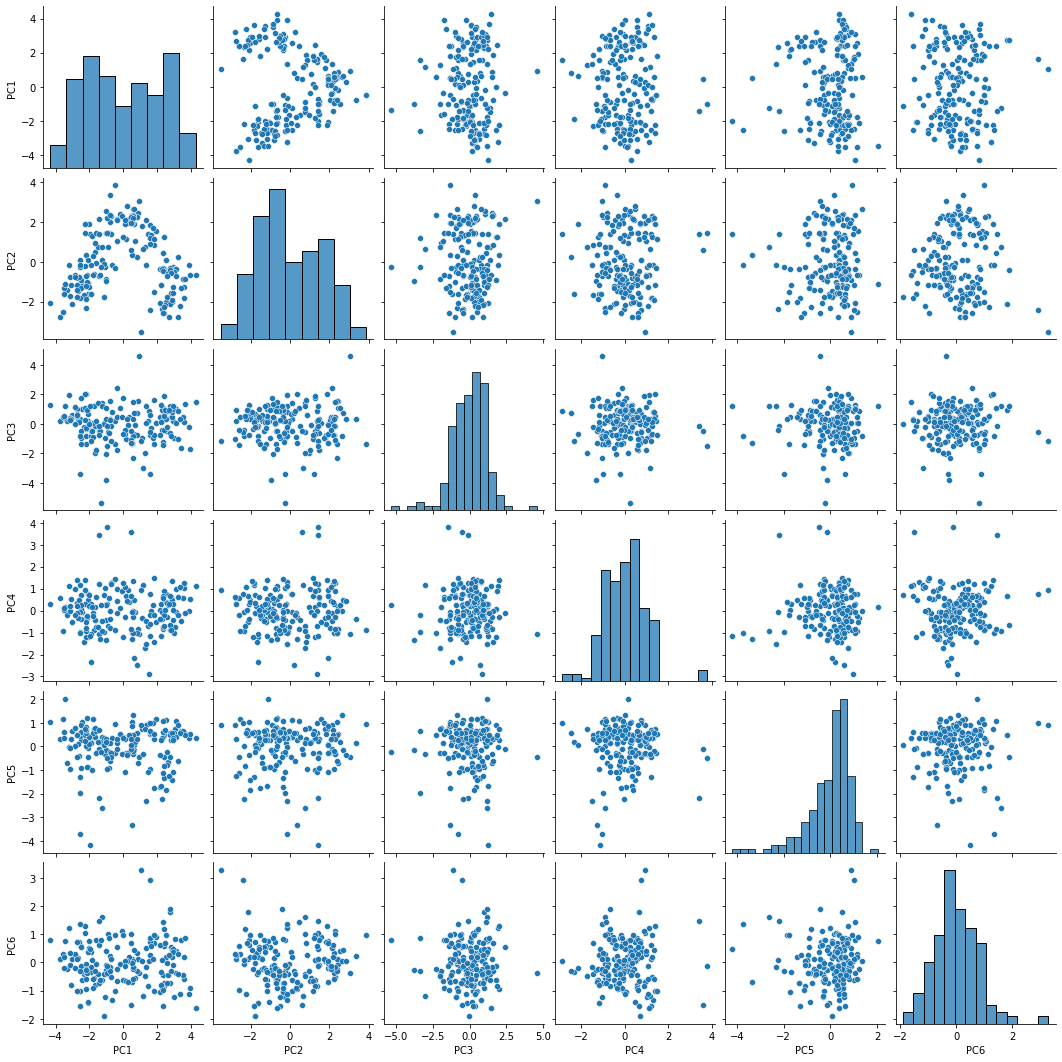

In [93]:
# Calculate the covariance matrix of mean-centered data
cov_red = np.cov(X_reduced, rowvar =False)

df_reduce = pd.DataFrame(X_reduced, columns = ["PC1","PC2","PC3","PC4","PC5","PC6",])

sns.pairplot(df_reduce, kind="scatter")

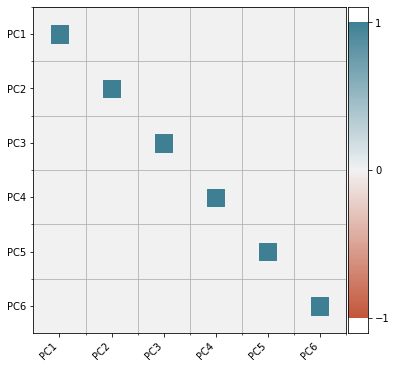

In [95]:
corr_red = df_reduce.corr() # Calculates correlation matrix

plt.figure(figsize=(6, 6))
corrplot(corr_red, size_scale=300);

## Use of PCA with sklearn

In [103]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# load dataset
data_wine = datasets.load_wine()

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_wine.data)


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [108]:
# Model extraction
model_PCA = pca_pipe.named_steps['pca']

# Array conversion functions
pd.DataFrame(
    data    = model_PCA.components_,
    columns = data_wine.feature_names,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']   
)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
PC9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
PC10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


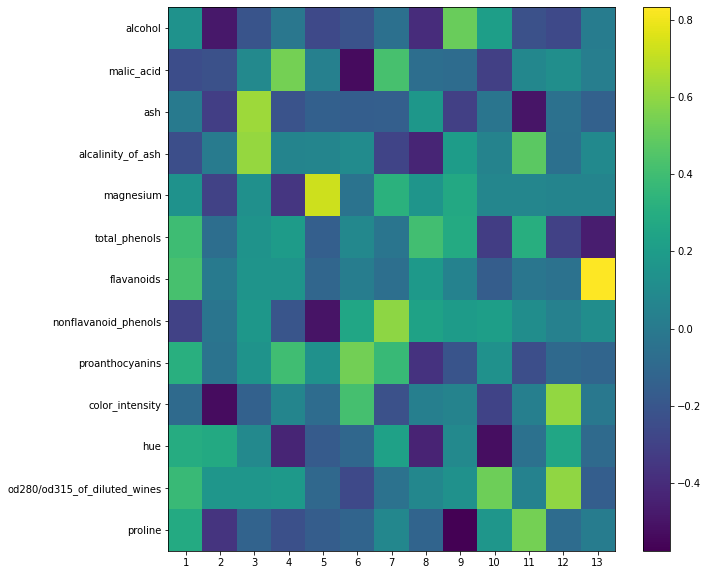

In [110]:
# Heath map of the components
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
components = model_PCA.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data_wine.feature_names)), data_wine.feature_names)
plt.xticks(range(len(data_wine.feature_names)), np.arange(model_PCA.n_components_) + 1)
plt.grid(False)
plt.colorbar();


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


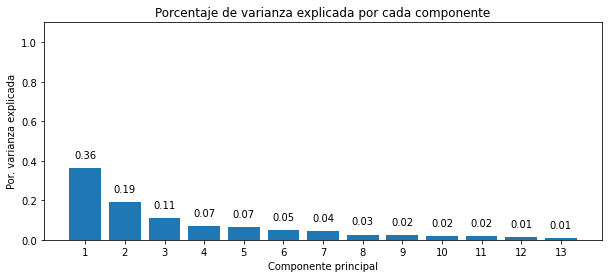

In [113]:
# Explained variance

print(model_PCA.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.bar(
    x      = np.arange(model_PCA.n_components_) + 1,
    height = model_PCA.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data_wine.feature_names)) + 1, model_PCA.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model_PCA.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


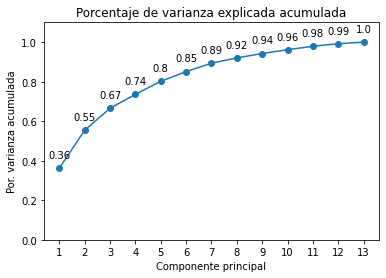

In [114]:
# Cumulative variance
prop_varianza_acum = model_PCA.explained_variance_ratio_.cumsum()
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_wine.feature_names)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data_wine.feature_names)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_PCA.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

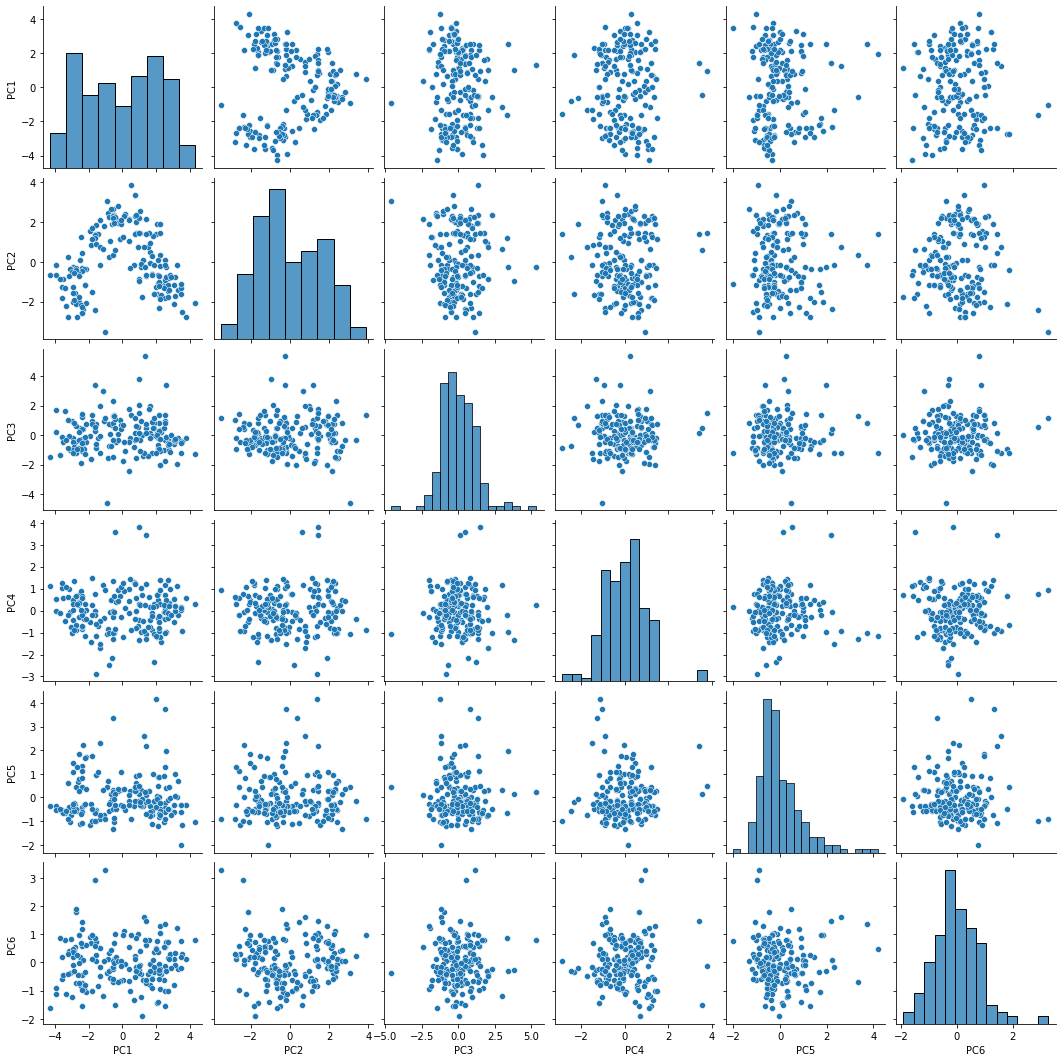

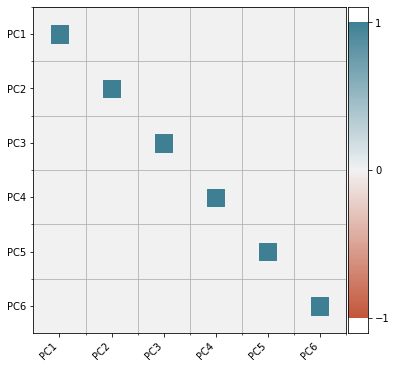

In [125]:
# Transform the data
proyections = pca_pipe.transform(X=data_wine.data)

df_proy = pd.DataFrame(proyections[:, 0:6], columns = ["PC1","PC2","PC3","PC4","PC5","PC6",])
sns.pairplot(df_proy, kind="scatter")

corr_red = df_reduce.corr() # Calculates correlation matrix
plt.figure(figsize=(6, 6))
corrplot(corr_red, size_scale=300);
